In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/pharv/Documents/GitHub/MLFlow_prj/data/processed/cleaned_train_data.csv")

In [3]:
X = pd.read_csv("C:/Users/pharv/Documents/GitHub/MLFlow_prj/data/interim/X_temp.csv")

In [4]:
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100083,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,100145,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100179,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
3,100190,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,238500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100295,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,774000.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,456083,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,274500.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
8598,456084,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8599,456140,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,643500.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
8600,456195,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [5]:
y = pd.read_csv("C:/Users/pharv/Documents/GitHub/MLFlow_prj/data/interim/y_temp.csv")

In [6]:
y

,TARGET
0,0
1,0
2,0
3,0
4,1
...,...
8597,0
8598,0
8599,1
8600,0


In [7]:
def separate_num_cat_features(columns, df):
    cat_columns = []
    cat_columns_indices = []
    num_columns = []
    for i in range(len(columns)):
        if df[columns[i]].dtype == 'object':
            cat_columns.append(columns[i])
            cat_columns_indices.append(i)
        else:
            num_columns.append(columns[i])
            
    return cat_columns, num_columns, cat_columns_indices

In [8]:
cat_columns, num_columns, cat_columns_indices = separate_num_cat_features(X.columns, df)

In [9]:
cat_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [10]:
cat_columns_indices

[1, 2, 3, 4, 10, 11, 12, 13, 14, 27, 31, 39, 85, 86, 88, 89]

## Feature Engineering

### Data Augmentation

In [11]:
from imblearn.over_sampling import SMOTENC

In [12]:
oversample = SMOTENC(categorical_features=cat_columns_indices)

In [13]:
X_balanced, y_balanced = oversample.fit_resample(X, y)

In [14]:
y_balanced.value_counts(normalize = True)

TARGET
0         0.5
1         0.5
dtype: float64

In [15]:
y_balanced.value_counts()

TARGET
0         8076
1         8076
dtype: int64

<AxesSubplot: ylabel='Frequency'>

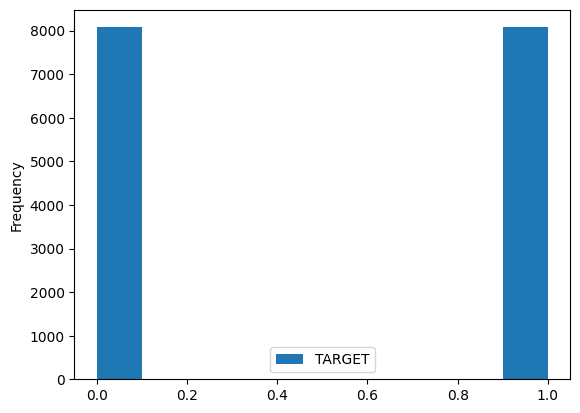

In [16]:
y_balanced.astype(int).plot.hist()

In [17]:
y_balanced

,TARGET
0,0
1,0
2,0
3,0
4,1
...,...
16147,1
16148,1
16149,1
16150,1


In [18]:
y_balanced.to_csv('C:/Users/pharv/Documents/GitHub/MLFlow_prj/data/processed/engineered_train_data.csv', index=False)

## Data Preprocessing

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
X_balanced[cat_columns] = X_balanced[cat_columns].apply(LabelEncoder().fit_transform)

In [21]:
X_balanced

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100083,0,1,0,1,0,103500.000000,5.736285e+05,24435.000000,4.635000e+05,...,0,0,0,0,0.0,0.000000,0.0,0.000000,0.0,3.000000
1,100145,0,0,0,1,1,202500.000000,2.607255e+05,16789.500000,1.980000e+05,...,0,0,0,0,0.0,0.000000,0.0,0.000000,0.0,3.000000
2,100179,0,0,0,0,0,202500.000000,6.750000e+05,53329.500000,6.750000e+05,...,0,0,0,0,0.0,0.000000,0.0,1.000000,0.0,4.000000
3,100190,0,1,0,0,0,162000.000000,2.636865e+05,24781.500000,2.385000e+05,...,0,0,0,0,0.0,0.000000,0.0,0.000000,0.0,3.000000
4,100295,0,1,0,0,1,225000.000000,1.019205e+06,31032.000000,7.740000e+05,...,1,0,0,0,0.0,0.000000,0.0,6.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16147,352516,0,1,0,1,0,200576.911673,5.203888e+05,40640.338527,4.492308e+05,...,0,0,0,0,0.0,0.000000,0.0,0.085471,0.0,0.085471
16148,252699,0,1,0,0,1,297860.268489,9.188838e+05,30763.686382,7.772129e+05,...,0,0,0,0,0.0,0.000000,0.0,0.000000,0.0,1.809559
16149,369863,0,0,0,0,1,218880.074954,1.373629e+06,50777.190507,1.241640e+06,...,0,0,0,0,0.0,0.660004,0.0,0.000000,0.0,0.660004
16150,442415,0,1,0,1,0,363464.693676,5.196661e+05,32932.133138,4.370197e+05,...,0,0,0,0,0.0,0.000000,0.0,0.961503,0.0,1.480752


In [22]:
X_balanced.to_csv('C:/Users/pharv/Documents/GitHub/MLFlow_prj/data/processed/x_balanced.csv', index=False)